### Sprint Review III

¿Qué logramos en este sprint?:
- Lenguaje_prog
- Salario_max (casi lo hemos conseguido categorizar)
- Varias visualizaciones (gráficas)
- Separar salarios por países
- Importar la librería de europa y filtrar los datos por Europa
- Profundizar en las preguntas y aproximarnos a la elaboración de dataframes al respecto de ellas

Próximos objetivos:
- Filtrar por todos los países de Europa
- Terminar de acordar los dataframes a las preguntas
- Elaborar las conclusiones de cada pregunta
- Organizar los archivos por preguntas (por ejemplo) o por tipo (EDA o limpieza) y hacer el README
- Presentación

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [101]:
df = pd.read_pickle("data/data_limpieza.pickle")

In [3]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
salario_max              40.742309
dtype: float64

#### Histograma por puestos segun especialidad


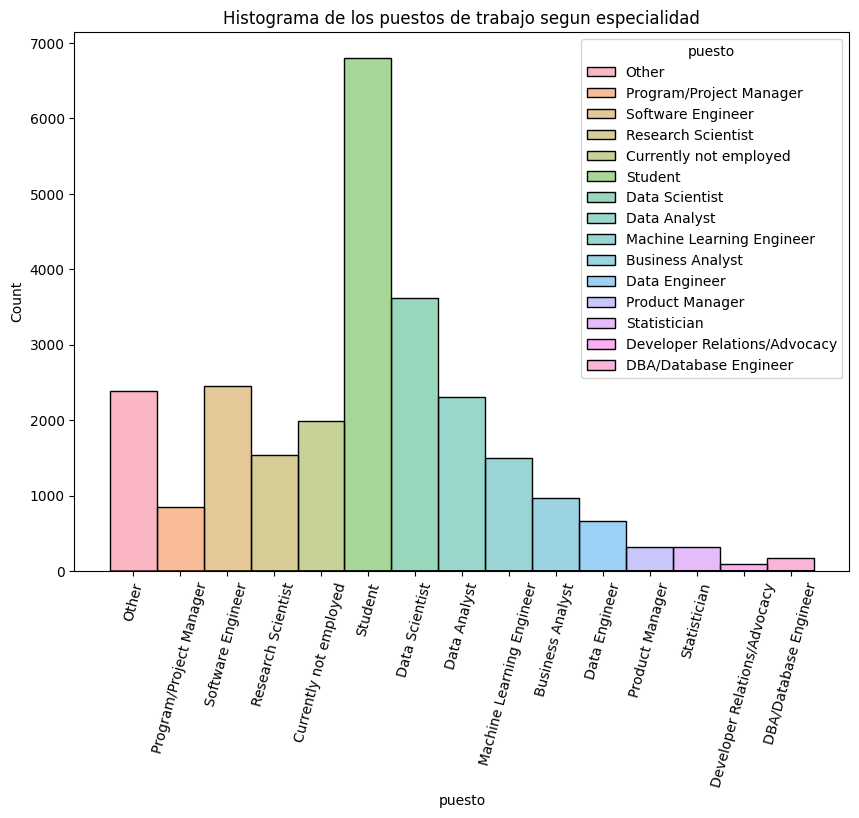

In [4]:
plt.figure(figsize =(10,7))

fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)
fig.set_title('Histograma de los puestos de trabajo segun especialidad')
plt.xticks(rotation= 75)

plt.show()

#### Counplot por sexos segun especialidad

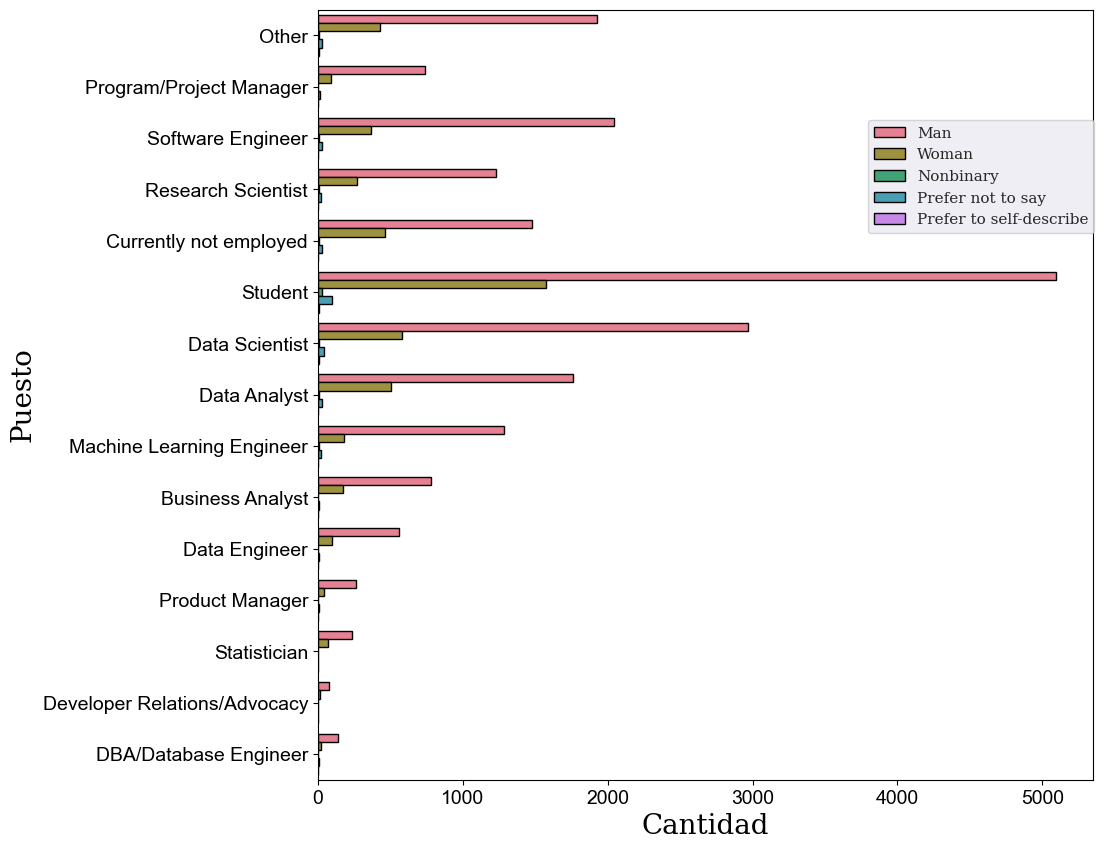

In [5]:
plt.figure(figsize = (10, 10))

fig = sns.countplot(data = df, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")
fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

#### Counplot por puesto segun la formacion

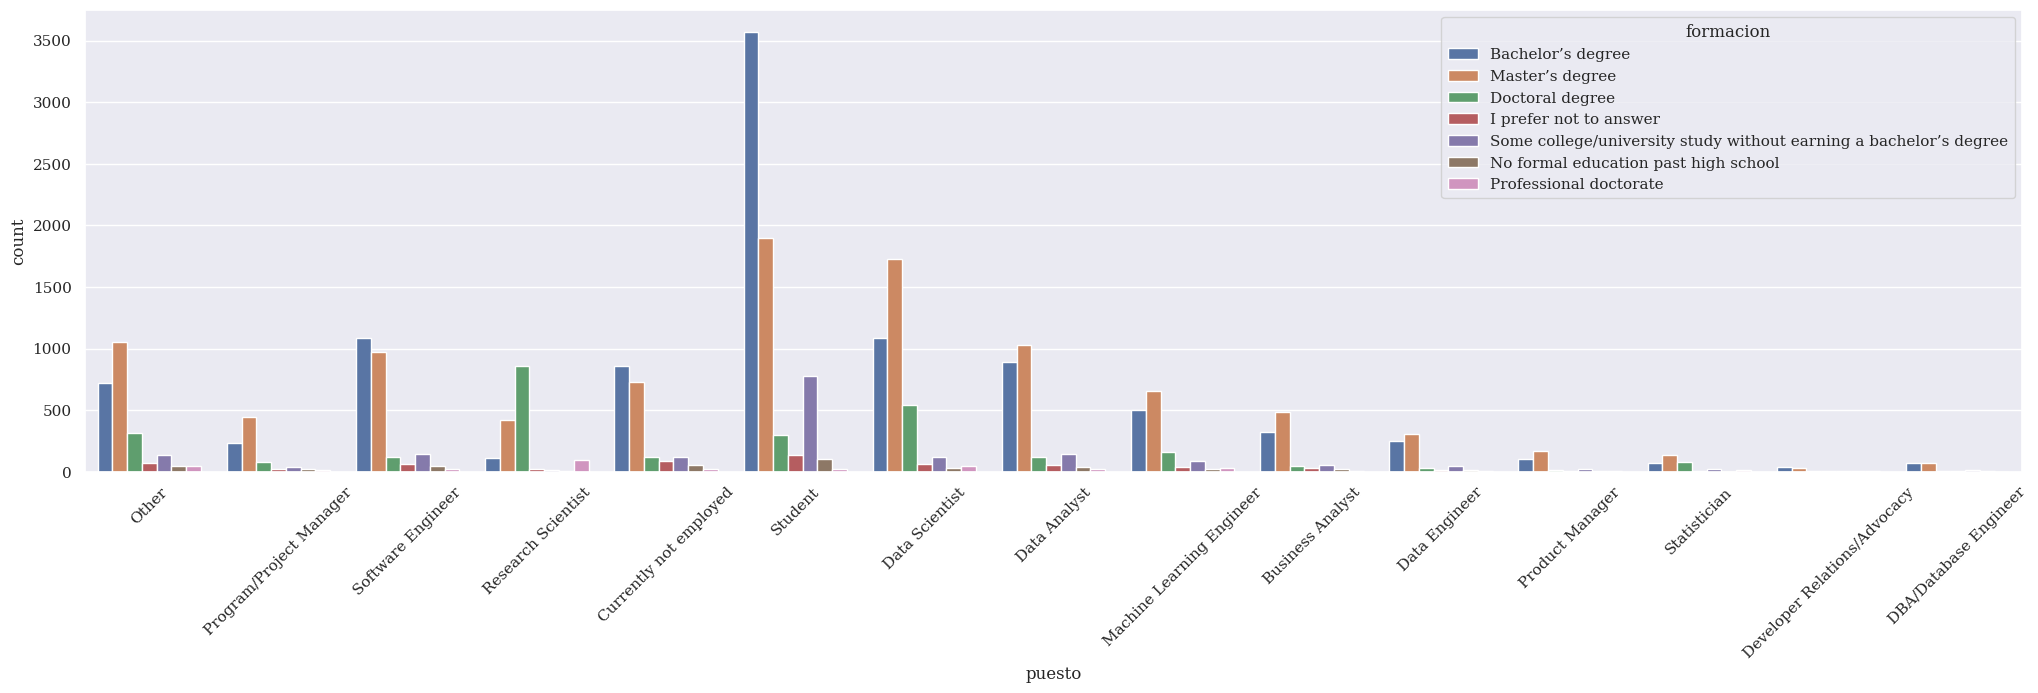

In [6]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'formacion')
plt.xticks(rotation = 45)

plt.show(); 

#### Counplot por puesto segun herramientas data

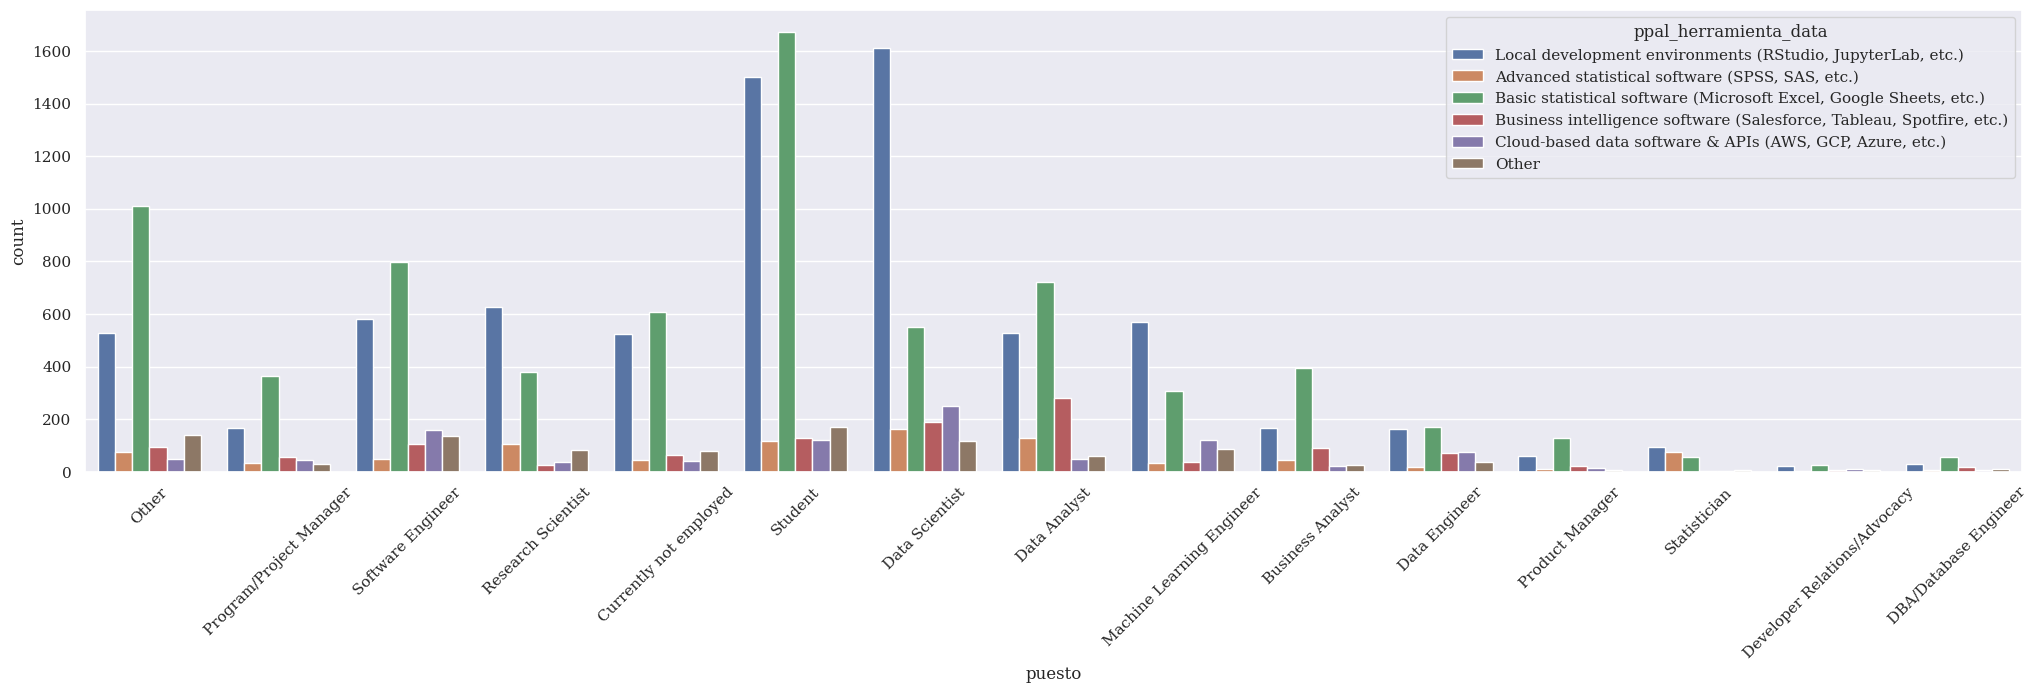

In [7]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'ppal_herramienta_data')

plt.xticks(rotation = 45)
plt.show(); 

----

#### Comenzamos a analizar la columna lenguaje_prog:

In [8]:
df.lenguaje_prog.value_counts()

Python                                                      4740
Python, SQL                                                 2374
Python, R, SQL                                              1160
Python, R                                                    955
Python, C++                                                  707
                                                            ... 
 R, SQL, C, Java, MATLAB                                       1
 R, SQL, C, Java                                               1
 R, C++, Java, Javascript, MATLAB                              1
Python, R, SQL, C++, Javascript, Julia, MATLAB                 1
Python, R, C, C++, Java, Javascript, Julia, Bash, MATLAB       1
Name: lenguaje_prog, Length: 825, dtype: int64

In [102]:
print(df["lenguaje_prog"].isnull().sum())


1032


In [10]:
df_lenguajeprog_sinnulos['Lenguaje']= df_lenguajeprog_sinnulos["lenguaje_prog"].apply(lambda x: x.split(',')) 

In [105]:
df_lenguajeprog_sinnulos["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)

In [106]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
salario_max              10582
rango_salario            10582
dtype: int64

     Una vez categorizados los nulos ya podemos separar la columna

In [107]:
df_lenguajeprog_sinnulos.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,Salario muy bajo


       Esta funcion nos ha creado una sola columna con una lista de valores.
       Decidimos separar cada respuesta en  una columna separada.

In [108]:
df_lenguajeprog_sinnulos[['1','2','3','4','5','6','7','8','9','10','11','12']] = df_lenguajeprog_sinnulos["lenguaje_prog"].str.split(',', expand=True, n=-1)

In [109]:
pd.options.display.max_columns=None
df_lenguajeprog_sinnulos.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,1,2,3,4,5,6,7,8,9,10,11,12
24761,24761,24761,501,35-39,Man,I do not wish to disclose my location,Master’s degree,Currently not employed,1-3 years,Bash,< 1 year,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, R","Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...","edX,Kaggle Learn Courses",NaN,NaN,<NA>,NaN,Python,R,None,None,None,None,None,None,None,None,None,None
5995,5995,5995,479,18-21,Man,Indonesia,Some college/university study without earning ...,Student,1-3 years,Python,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,"Python, SQL, C++","Visual Studio ,Visual Studio Code (VSCode) , S...",NaN,NaN,NaN,<NA>,NaN,Python,SQL,C++,None,None,None,None,None,None,None,None,None
7802,7802,7802,435,25-29,Woman,Other,Bachelor’s degree,Data Analyst,< 1 years,Python,I do not use machine learning methods,"1000-9,999 employees",No (we do not use ML methods),10000-14999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",Python,PyCharm,DataCamp,NaN,NaN,14999,Salario muy bajo,Python,None,None,None,None,None,None,None,None,None,None,None
17231,17231,17231,977,45-49,Man,United States of America,Doctoral degree,Student,3-5 years,MATLAB,3-4 years,NaN,NaN,NaN,NaN,Other,"Python, Java, Javascript, MATLAB",MATLAB,Fast.ai,NaN,NaN,<NA>,NaN,Python,Java,Javascript,MATLAB,None,None,None,None,None,None,None,None
11584,11584,11584,602,55-59,Man,United States of America,Master’s degree,Data Scientist,20+ years,Python,5-10 years,"10,000 or more employees","We have well established ML methods (i.e., mod...",300000-499999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Learn Courses,NaN,NaN,499999,Salario medio-alto,Python,SQL,None,None,None,None,None,None,None,None,None,None


In [110]:
df_lenguajeprog_sinnulos.isnull().sum()

level_0                      0
index                        0
time                         0
age                          0
gender                       0
pais                         0
formacion                    0
puesto                       0
experiencia_prog             0
lenguaje_top              1033
exp_ml                    2219
tamaño_empresa            9722
uso_ml                   10021
salario                  10582
inversion_ml             10790
ppal_herramienta_data     7484
lenguaje_prog                0
plataforma                1039
plat_cursos               7841
nubes                    16797
plataforma_top           22846
salario_max              10582
rango_salario            10582
1                            0
2                         7373
3                        14439
4                        20102
5                        23167
6                        24703
7                        25428
8                        25776
9                        25896
10      

In [18]:
df_lenguajeprog_sinnulos["1"][0:3]

0    Python
1       SQL
2    Python
Name: 1, dtype: object

In [112]:
df_lenguajeprog_sinnulos["1"].value_counts()

Python         21860
unknown         1032
 SQL             850
 R               757
 C               350
 None            319
 Other           237
 C++             178
 Java            164
 Javascript      119
 MATLAB           71
 Bash             15
 Swift            13
 Julia             8
Name: 1, dtype: int64

In [114]:
df_lenguajeprog_sinnulos["2"].value_counts()

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 2, dtype: int64

In [115]:
df_lenguajeprog_sinnulos["3"].value_counts()

 SQL           2778
 C++           2074
 C             1709
 Java          1516
 Javascript    1227
 MATLAB         775
 Bash           683
 Other          659
 Julia           73
 Swift           40
Name: 3, dtype: int64

In [116]:
df_lenguajeprog_sinnulos["4"].value_counts()

 C++           1253
 Java          1153
 Javascript    1021
 MATLAB         622
 Bash           576
 Other          568
 C              560
 Julia           67
 Swift           51
Name: 4, dtype: int64

In [117]:
df_lenguajeprog_sinnulos["5"].value_counts()

 Java          743
 Javascript    594
 MATLAB        404
 C++           382
 Other         306
 Bash          300
 Julia          45
 Swift          32
Name: 5, dtype: int64

In [118]:
df_lenguajeprog_sinnulos.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'rango_salario', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

----

In [ ]:
df_explode =df_lenguajeprog_sinnulos.explode('Lenguaje')

In [26]:
df_group_leng =pd.DataFrame(df_explode.groupby('Lenguaje')['Lenguaje'].count())
df_group_leng

,Lenguaje
Lenguaje,
Bash,2216
C,4709
C++,5535
Java,4769
Javascript,4332
Julia,305
MATLAB,2935
None,319
Other,2575


In [27]:
df_group_leng.rename(columns={'Lenguaje':'conteo_eleccion'}, inplace= True)

In [28]:
df_group_leng.reset_index(inplace=True)

In [29]:
df_group_leng

,Lenguaje,conteo_eleccion
0,Bash,2216
1,C,4709
2,C++,5535
3,Java,4769
4,Javascript,4332
5,Julia,305
6,MATLAB,2935
7,None,319
8,Other,2575
9,R,5334


#### Pie por tipo de lenguaje de programacion

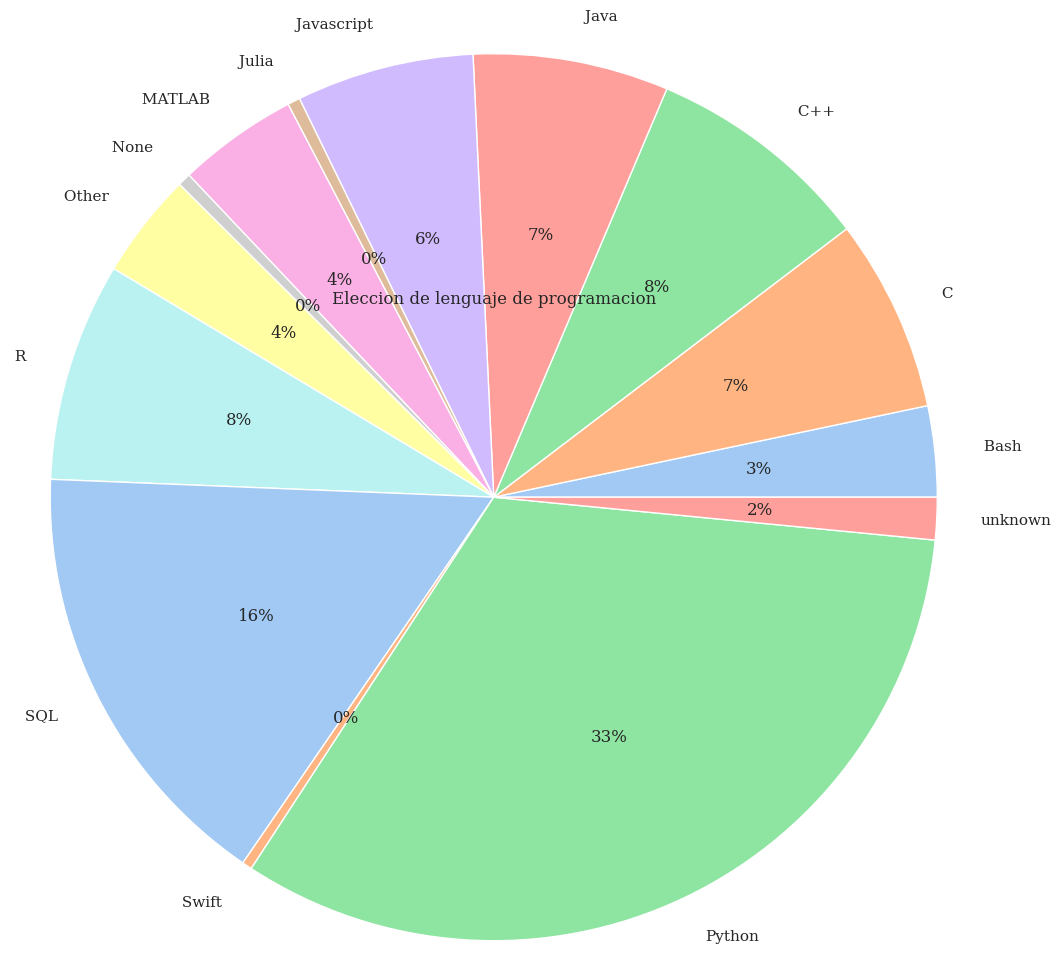

In [30]:
# Hacemos la grafica pero para el recuento total de registros respecto del explode.
plt.figure()

colors = sns.color_palette('pastel')[0:13]

plt.pie(df_group_leng['conteo_eleccion'],colors= colors, labels=df_group_leng["Lenguaje"], autopct= '%.0f%%', radius= 3)
plt.title('Eleccion de lenguaje de programacion')

plt.show();

---

        Realizamos analisis respecto a los registros del DataFrame original sin tener en cuenta el explode.


In [31]:
total=df_lenguajeprog_sinnulos.shape[0]
total

25973

In [32]:
def porcentajes (x):
    return round((x/total)*100, 2)

In [121]:
df_group_leng['porcentaje']= df_group_leng['conteo_eleccion'].apply(porcentajes)
df_group_leng

,Lenguaje,conteo_eleccion,porcentaje
0,Bash,2216,8.53
1,C,4709,18.13
2,C++,5535,21.31
3,Java,4769,18.36
4,Javascript,4332,16.68
5,Julia,305,1.17
6,MATLAB,2935,11.30
7,None,319,1.23
8,Other,2575,9.91
9,R,5334,20.54


In [35]:
df_group_leng.dtypes

Lenguaje            object
conteo_eleccion      int64
porcentaje         float64
dtype: object

#### Barplot con los porcentajes segun tipo de lenguaje de programacion

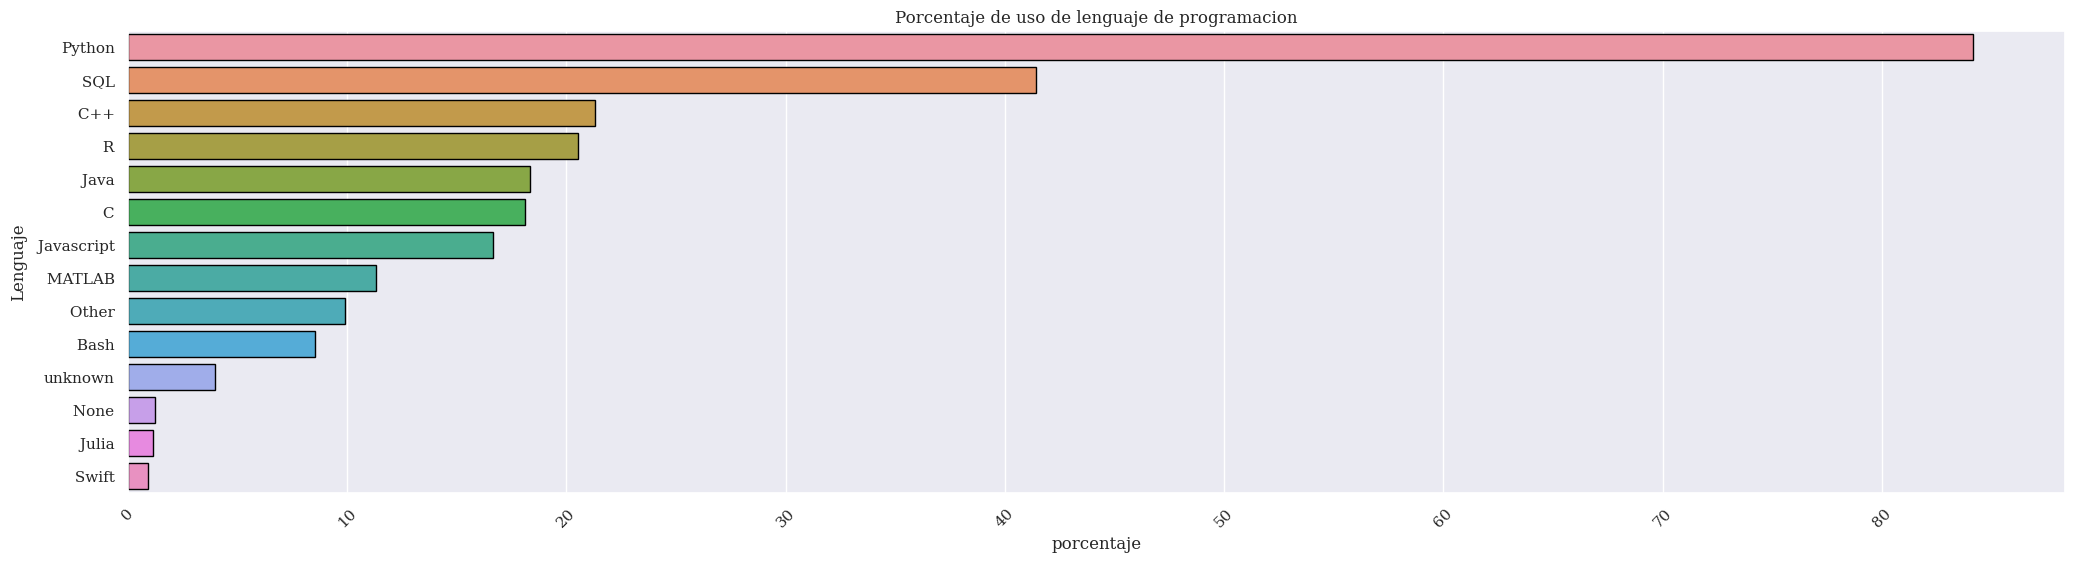

In [36]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

ordenado =df_group_leng.sort_values("porcentaje", ascending=False)
fig = sns.barplot(x = 'porcentaje', y= 'Lenguaje', data = ordenado, edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)

plt.show(); 

        Vemos que realizar una comparacion entre variables categoricas con el dataframe que ya tiene agrupado por lenguaje no nos sirve, por lo que vamos a trabajar directamente sobre el df_explode que tiene todos los registros.

In [37]:
df_explode.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'Lenguaje', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

In [38]:
df_lenguajes=df_explode[['gender','puesto','formacion','experiencia_prog', 'Lenguaje']]
df_lenguajes

,gender,puesto,formacion,experiencia_prog,Lenguaje
0,Man,Other,Bachelor’s degree,5-10 years,Python
0,Man,Other,Bachelor’s degree,5-10 years,R
1,Man,Program/Project Manager,Master’s degree,20+ years,SQL
1,Man,Program/Project Manager,Master’s degree,20+ years,C
1,Man,Program/Project Manager,Master’s degree,20+ years,C++
...,...,...,...,...,...
25969,Man,Student,Master’s degree,1-3 years,Python
25970,Man,Research Scientist,Doctoral degree,I have never written code,unknown
25971,Man,Data Scientist,Master’s degree,5-10 years,Python
25971,Man,Data Scientist,Master’s degree,5-10 years,SQL


#### Countplot segun puesto y lenguajes de programacion

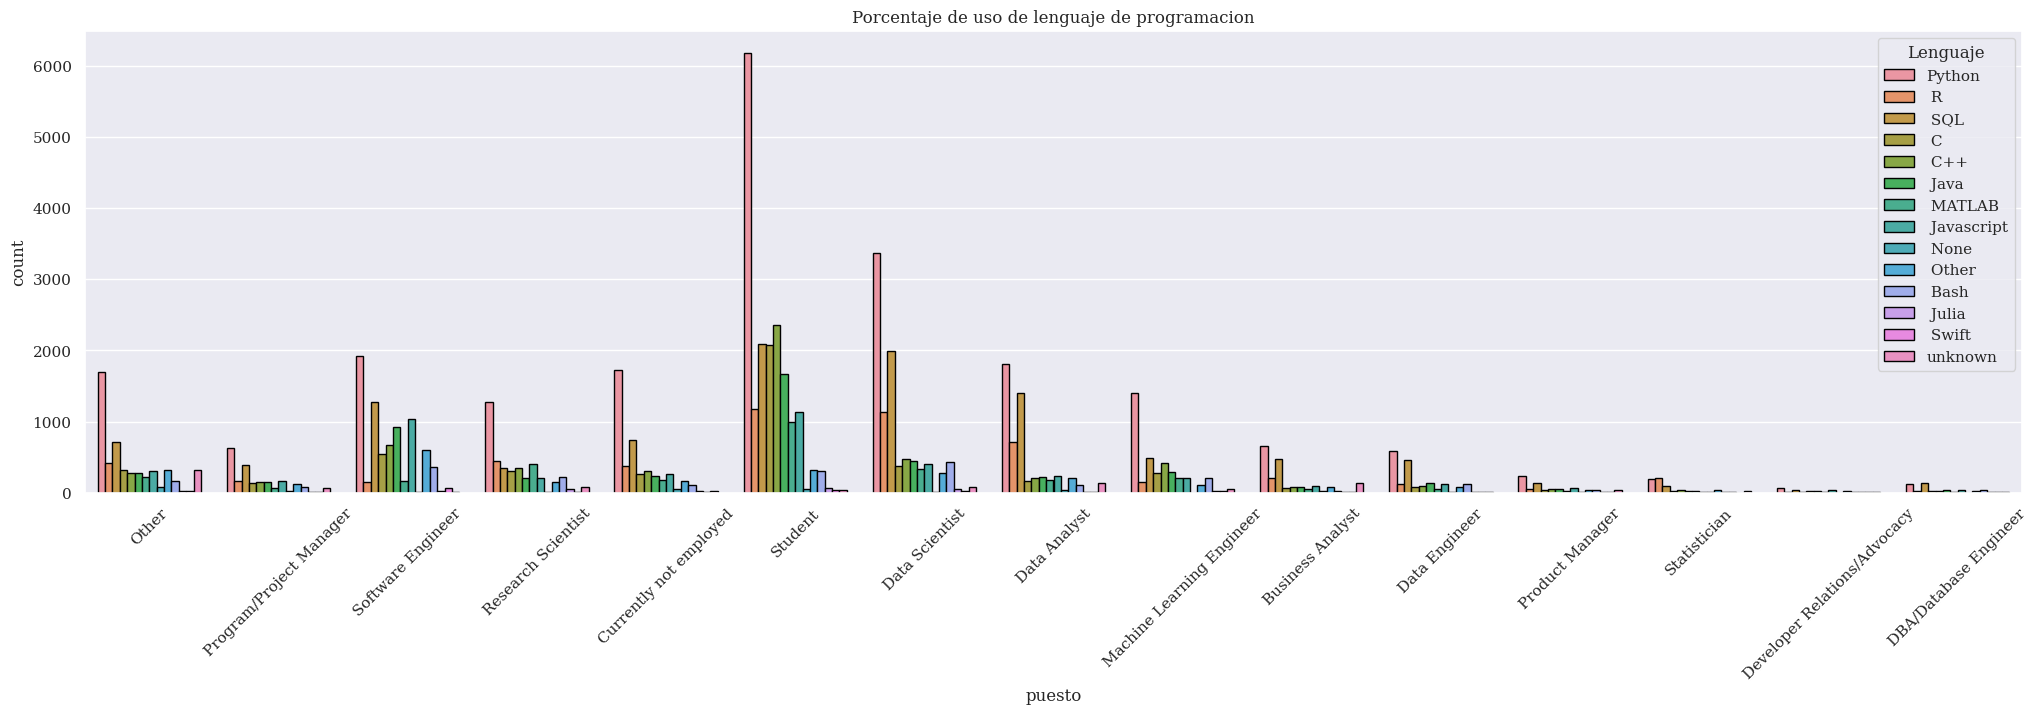

In [39]:
plt.figure( figsize=(25,6))

sns.set_color_codes("pastel")
sns.set(font = "serif")

fig = sns.countplot(x = 'puesto', data = df_lenguajes, hue= 'Lenguaje',edgecolor = 'black')

plt.title('Porcentaje de uso de lenguaje de programacion')
plt.xticks(rotation = 45)
plt.show(); 

In [41]:
lista_puesto= ['Program/Project Manager',
 'Software Engineer',
 'Research Scientist',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Business Analyst',
 'Data Engineer',
 'Product Manager',
 'Statistician',
 'Developer Relations/Advocacy',
 'DBA/Database Engineer']

In [42]:
df_puesto_filtrado = df_explode[df_explode['puesto'].isin(lista_puesto)]
df_puesto_filtrado.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,SQL,SQL,C,C++,Java,None,None,None,None,None,None,None,None
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,C,SQL,C,C++,Java,None,None,None,None,None,None,None,None


In [43]:
df_puesto_filtrado['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [45]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

----


#### Comenzamos a trabajar con la columna de salario 

In [46]:
df['salario'].unique()

array(['25000-29999', '60000-69999', '0-999', '30000-39999', nan,
       '15000-19999', '70000-79999', '2000-2999', '10000-14999',
       '5000-7499', '20000-24999', '1000-1999', '100000-124999',
       '7500-9999', '4000-4999', '40000-49999', '50000-59999',
       '3000-3999', '300000-499999', '200000-249999', '125000-149999',
       '250000-299999', '80000-89999', '90000-99999', '150000-199999',
       '-1000000', '500000-999999'], dtype=object)

In [47]:
df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') 
#Quitamos todos los simbolos que estaban por demas en el string.

/var/folders/f0/204ksvss62b9dwtcgg8q17540000gn/T/ipykernel_14963/2148480061.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') #Quitamos todos los simbolos que estaban por demas en el string.


In [48]:
df['salario_max']=df["salario"].str.split('-', n=1, expand=True).get(1) 
# Separamos el rango del salario para quedarnos con el mayor y poder convertir la columna en numerica

In [49]:
df['salario_max'].unique()

array(['29999', '69999', '999', '39999', None, '19999', '79999', '2999',
       '14999', '7499', '24999', '1999', '124999', '9999', '4999',
       '49999', '59999', '3999', '499999', '249999', '149999', '299999',
       '89999', '99999', '199999', '1000000', '999999'], dtype=object)

In [50]:
df[df["salario"] == "1000000"].count()

level_0                  0
index                    0
time                     0
age                      0
gender                   0
pais                     0
formacion                0
puesto                   0
experiencia_prog         0
lenguaje_top             0
exp_ml                   0
tamaño_empresa           0
uso_ml                   0
salario                  0
inversion_ml             0
ppal_herramienta_data    0
lenguaje_prog            0
plataforma               0
plat_cursos              0
nubes                    0
plataforma_top           0
salario_max              0
dtype: int64

In [122]:
print(df["salario_max"].isnull().sum())
print(df["salario"].isnull().sum())

10582
10582


In [68]:
df.dtypes

level_0                    int64
index                      int64
time                       int64
age                       object
gender                    object
pais                      object
formacion                 object
puesto                    object
experiencia_prog          object
lenguaje_top              object
exp_ml                    object
tamaño_empresa            object
uso_ml                    object
salario                   object
inversion_ml              object
ppal_herramienta_data     object
lenguaje_prog             object
plataforma                object
plat_cursos               object
nubes                     object
plataforma_top            object
salario_max              float64
dtype: object

In [123]:
df['salario_max']=df['salario_max'].astype("Int64", errors= 'ignore')
df['salario_max'].info

<bound method Series.info of 0        29999
1        69999
2          999
3        39999
4        39999
         ...  
25968    19999
25969     <NA>
25970      999
25971     <NA>
25972      999
Name: salario_max, Length: 25973, dtype: Int64>

In [55]:
# def salario_max(col):
#     try:
#         return int(col)

#     except:
#         return np.nan

In [64]:
#df["salario_max"] = df["salario_max"].apply(salario_max)

In [73]:
df["salario_max"].isnull().sum()

10582

In [83]:
df_estudiantes = df[df["puesto"] == "Student"]
print(df_estudiantes.shape)
print('----------')
print(df_estudiantes["salario_max"].isnull().sum())


(6804, 22)
----------
6804


In [84]:
df_other = df[df["puesto"] == "Other"]
print(df_other.shape)
print('----------')
print(df_other["salario_max"].isnull().sum())

(2393, 22)
----------
189


In [85]:
df_desem = df[df["puesto"] == "Currently not employed"]
print(df_desem.shape)
print('----------')
print(df_desem["salario_max"].isnull().sum())

(1986, 22)
----------
1986


In [88]:
df["rango_salario"] = pd.cut(df["salario_max"], 12, right = True, labels = ["Salario muy bajo",
                "Salario bajo", "Salario bajo-medio", "Salario bajo-medio", "Salario medio", "Salario medio-alto", 
                "Salario alto", "Salario alto", "Salario muy alto", "Salario muy alto", "Salario altísimo", "Salario altísimo"], 
                ordered = False)

In [89]:
df.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario
22292,22292,22292,670,22-24,Man,China,Doctoral degree,Student,3-5 years,Python,3-4 years,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,Visual Studio Code (VSCode),NaN,NaN,NaN,<NA>,NaN
13281,13281,13281,730,45-49,Man,Spain,Master’s degree,Data Analyst,5-10 years,Python,< 1 year,0-49 employees,We are exploring ML methods (and may one day p...,70000-79999,"$1000-$9,999","Basic statistical software (Microsoft Excel, G...","Python, R, Javascript",Jupyter Notebook,University Courses (resulting in a university ...,GitHub,NaN,79999,Salario muy bajo
15402,15402,15402,706,22-24,Man,China,Master’s degree,Student,< 1 years,C++,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,"Python, C, C++, MATLAB","Visual Studio ,PyCharm ,MATLAB ,Jupyter Notebook",NaN,NaN,NaN,<NA>,NaN
24065,24065,24065,55451,18-21,Man,Other,Bachelor’s degree,Software Engineer,< 1 years,Python,I do not use machine learning methods,0-49 employees,I do not know,0-999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, Javascript","Visual Studio Code (VSCode) ,PyCharm",Udemy,GitHub,NaN,999,Salario muy bajo
25631,25631,25631,276,22-24,Man,United States of America,Bachelor’s degree,Data Analyst,1-3 years,Python,< 1 year,0-49 employees,No (we do not use ML methods),40000-49999,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, SQL",Jupyter Notebook,Udemy,NaN,NaN,49999,Salario muy bajo


In [90]:
df_salarios_pais= pd.DataFrame(df.groupby(['pais','gender', 'puesto'])['salario_max'].mean().round(2))

#### Importamos libreria AWOC para trabajar con los paises 

-----


In [ ]:
pip install a-world-of-countries #Instalacion de libreria

In [127]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()

In [128]:
europa= my_world.get_countries_list_of('Europe')


In [ ]:

for x in df['pais']:
   for i in europa: 
        if x in (europa):
            df['europa']= 'SI'
        else:
            df['europa']= 'NO'

In [130]:
df['pais']
europa

['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Jersey',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Svalbard and Jan Mayen',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'Vatican']